In [2]:
# Task 1: Image Classification on CIFAR-10
"""

In this task, you will classify images from the CIFAR-10 dataset using CNN

**Instructions:**
1. The code will automatically load 10 random images from the CIFAR-10 test set.
2. The CNN will predict the top 3 labels for each image.
3. Observe which images are easy or hard to classify.

"""


'\n\nIn this task, you will classify images from the CIFAR-10 dataset using CNN\n\n**Instructions:**\n1. The code will automatically load 10 random images from the CIFAR-10 test set.\n2. The CNN will predict the top 3 labels for each image.\n3. Observe which images are easy or hard to classify.\n\n'

Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4423 - loss: 1.5506 - val_accuracy: 0.5058 - val_loss: 1.3688
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5664 - loss: 1.2294 - val_accuracy: 0.5782 - val_loss: 1.1908
Epoch 3/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6158 - loss: 1.0967 - val_accuracy: 0.6364 - val_loss: 1.0419
Epoch 4/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6474 - loss: 1.0072 - val_accuracy: 0.6584 - val_loss: 1.0086
Epoch 5/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6731 - loss: 0.9384 - val_accuracy: 0.6630 - val_loss: 0.9978
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


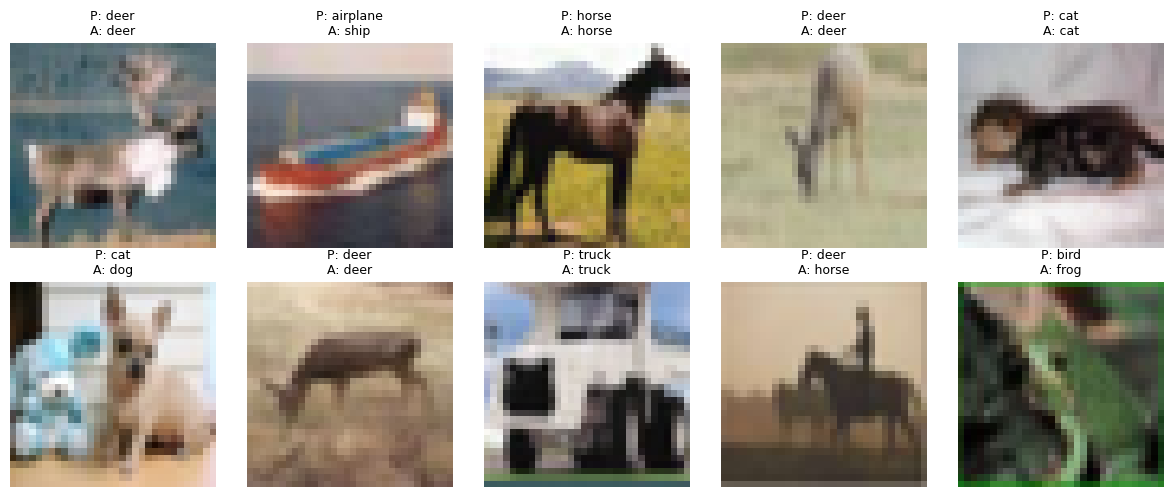

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# 1. Load CIFAR-10 dataset
# -------------------------------
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # normalize to [0,1]

cifar10_labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# -------------------------------
# 2. Build a simple CNN
# -------------------------------
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# -------------------------------
# 3. Train the model (quick demo)
# -------------------------------
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# -------------------------------
# 4. Predict 10 random test images
# -------------------------------
indices = np.random.choice(len(x_test), 10, replace=False)
x_sample = x_test[indices]
y_sample = y_test[indices]

preds = model.predict(x_sample)

# -------------------------------
# 5. Display predictions in a grid
# -------------------------------
plt.figure(figsize=(12,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_sample[i])  # keep original 32x32 resolution
    plt.axis('off')
    plt.title(f"P: {cifar10_labels[np.argmax(preds[i])]}\nA: {cifar10_labels[y_sample[i][0]]}", fontsize=9)
plt.tight_layout()
plt.show()


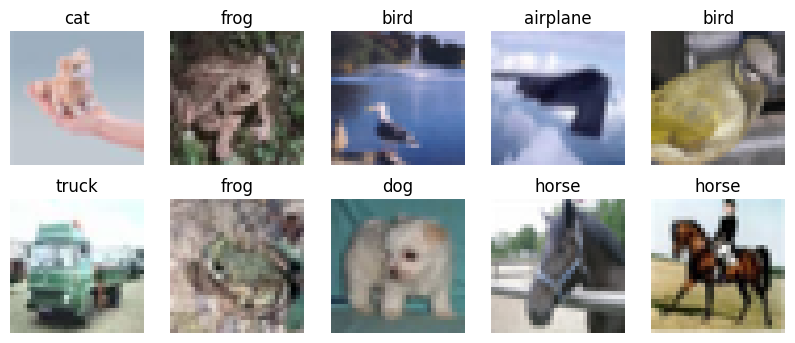

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Pick 10 random images from test set
indices = np.random.choice(len(x_test), 10, replace=False)
images = x_test[indices]
labels = y_test[indices]
cifar10_labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Display in a 2x5 grid
plt.figure(figsize=(10,4))
for i, img in enumerate(images):
    plt.subplot(2,5,i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(cifar10_labels[labels[i][0]])
plt.show()
